In [88]:
#importing the required packs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.utils import shuffle
from sklearn.metrics import classification_report,accuracy_score
from skimage import color
from skimage import io
from imutils import paths



In [89]:
import tensorflow as tf
import keras


In [90]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

(512, 512)


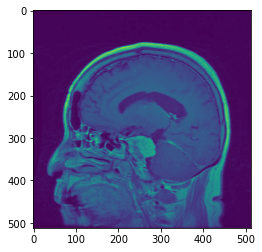

In [91]:
#1. IMAGE PRE-PROCESSING
#The actions in this section will help the main SVM model to work with the images provided and preferably also reduce the
# size/shape of the data so that the memory of the code will not exceed the limit Jupyter Notebook has. 

#Creating a path for the source dataset (which are the images) and storing it in a list.
path=(r"C:\Users\melek\OneDrive\Belgeler\Year 4\AMLS\CW\dataset\image")
images_list= []
images_paths = sorted(list(paths.list_images(path)))

#One of our first tasks will be to convert the pixels of the images into an array form. 
#To do this, we must first make sure that the images provided are in grayscale.
for path in images_paths:
    file=cv2.imread(path)
    images_grayscale = cv2.cvtColor(file,cv2.COLOR_BGR2GRAY)
    images_list.append(images_grayscale)


    
plt.imshow(images_list[0])
print(images_list[0].shape)

#This prepares the labels so they can be processed: 
file_labels = pd.read_csv(r"C:\Users\melek\OneDrive\Belgeler\Year 4\AMLS\CW\dataset\label.csv")
Images = []
Labels = []

In [92]:
file_labels = pd.read_csv(r"C:\Users\melek\OneDrive\Belgeler\Year 4\AMLS\CW\dataset\label.csv")


In [93]:
all_labels=list(set(file_labels['label'].tolist()))
print('All possible labels:', all_labels)
labels_map = {all_labels[x]:x for x in range (len(all_labels))}
print(labels_map)

All possible labels: ['pituitary_tumor', 'meningioma_tumor', 'glioma_tumor', 'no_tumor']
{'pituitary_tumor': 0, 'meningioma_tumor': 1, 'glioma_tumor': 2, 'no_tumor': 3}


In [94]:
#One hot encoding
from tensorflow import one_hot
one_hot_matrix = np.zeros([len(file_labels['file_name'].tolist()),len(all_labels)])
for x in range(one_hot_matrix.shape[0]):
    one_hot_matrix[x, labels_map[file_labels['label'].iloc[x]]]=1
                

In [95]:
print(one_hot_matrix)
encoded_labels=one_hot_matrix

for x in range (0,3000):
    Images.append(images_list[x])

Labels.append(one_hot_matrix)


[[0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 1. 0. 0.]
 ...
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [1. 0. 0. 0.]]


In [96]:
Images=np.array(Images)

print(Images.shape)

(3000, 512, 512)


In [97]:
 Images, encoded_labels = shuffle(Images,encoded_labels)

In [99]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical, normalize
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D,MaxPool2D, Dropout
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import GlobalAveragePooling2D

In [13]:
model_2 = Sequential()
model_2.add(Conv2D(filters=32, kernel_size=5, activation="relu", padding='same', input_shape=[512,512,1]))
model_2.add(MaxPool2D())
model_2.add(Dropout(0.1))
model_2.add(Conv2D(filters=32, kernel_size=5, activation="relu", padding='same'))
model_2.add(MaxPool2D())
model_2.add(Dropout(0.1))
model_2.add(Flatten())
model_2.add(Dense(units=30, activation="relu"))
model_2.add(Dense(units=12, activation="relu"))
model_2.add(Dense(units=4, activation="softmax"))

model_2.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history_2 = model_2.fit(Images,encoded_labels,validation_split=0.2,epochs=10)

Epoch 1/10
75/75 [==============================] - 1402s 19s/step - loss: 20.1837 - accuracy: 0.5196 - val_loss: 0.7953 - val_accuracy: 0.7083
Epoch 2/10
75/75 [==============================] - 949s 13s/step - loss: 0.5873 - accuracy: 0.7837 - val_loss: 0.5846 - val_accuracy: 0.8017
Epoch 3/10
75/75 [==============================] - 840s 11s/step - loss: 0.3247 - accuracy: 0.8883 - val_loss: 0.5268 - val_accuracy: 0.8317
Epoch 4/10
75/75 [==============================] - 882s 12s/step - loss: 0.1870 - accuracy: 0.9371 - val_loss: 0.5117 - val_accuracy: 0.8583
Epoch 5/10
75/75 [==============================] - 1417s 19s/step - loss: 0.1387 - accuracy: 0.9513 - val_loss: 0.5662 - val_accuracy: 0.8317
Epoch 6/10
75/75 [==============================] - 1648s 22s/step - loss: 0.1388 - accuracy: 0.9629 - val_loss: 0.6505 - val_accuracy: 0.8517
Epoch 7/10
75/75 [==============================] - 1551s 21s/step - loss: 0.1003 - accuracy: 0.9675 - val_loss: 0.8570 - val_accuracy: 0.8050
E

In [101]:
model_optimal = Sequential()
model_optimal.add(Conv2D(filters=32, kernel_size=5, activation="relu", padding='same', input_shape=[512,512,1]))
model_optimal.add(MaxPool2D())
model_optimal.add(Dropout(0.1))
model_optimal.add(Conv2D(filters=32, kernel_size=5, activation="relu", padding='same'))
model_optimal.add(MaxPool2D())
model_optimal.add(Dropout(0.1))
model_optimal.add(Flatten())
model_optimal.add(Dense(units=30, activation="relu"))
model_optimal.add(Dense(units=12, activation="relu"))
model_optimal.add(Dense(units=4, activation="softmax"))

model_optimal.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history_optimal = model_optimal.fit(Images,encoded_labels,validation_split=0.2,epochs=7)

Epoch 1/7
75/75 [==============================] - 1665s 22s/step - loss: 9.1050 - accuracy: 0.4238 - val_loss: 1.0829 - val_accuracy: 0.5350
Epoch 2/7
75/75 [==============================] - 1995s 27s/step - loss: 0.7792 - accuracy: 0.6850 - val_loss: 0.7994 - val_accuracy: 0.7067
Epoch 3/7
75/75 [==============================] - 1634s 22s/step - loss: 0.4972 - accuracy: 0.8200 - val_loss: 0.6881 - val_accuracy: 0.7600
Epoch 4/7
75/75 [==============================] - 1784s 24s/step - loss: 0.3138 - accuracy: 0.8967 - val_loss: 0.6661 - val_accuracy: 0.7883
Epoch 5/7
75/75 [==============================] - 1430s 19s/step - loss: 0.2506 - accuracy: 0.9179 - val_loss: 0.7602 - val_accuracy: 0.8167
Epoch 6/7
75/75 [==============================] - 2284s 31s/step - loss: 0.2001 - accuracy: 0.9467 - val_loss: 0.7484 - val_accuracy: 0.8167
Epoch 7/7
75/75 [==============================] - 2132s 28s/step - loss: 0.1125 - accuracy: 0.9642 - val_loss: 0.9454 - val_accuracy: 0.8067


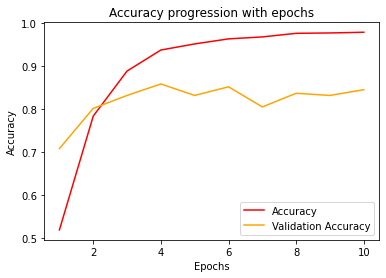

In [16]:
accuracy = history_2.history['accuracy']
validation_accuracy = history_2.history['val_accuracy']
epochs = range(1,11)
plt.plot(epochs, accuracy, 'r', label='Accuracy')
plt.plot(epochs, validation_accuracy, 'orange', label='Validation Accuracy')
plt.title('Accuracy progression with epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

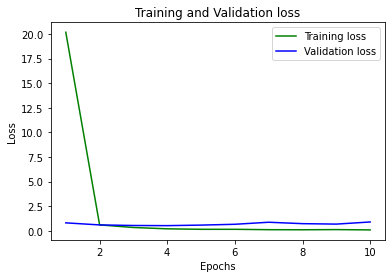

In [14]:
loss_training = history_2.history['loss']
loss_validation = history_2.history['val_loss']
epochs = range(1,11)
plt.plot(epochs, loss_training, 'g', label='Training loss')
plt.plot(epochs, loss_validation, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [102]:
path_test=(r"C:\Users\melek\OneDrive\Belgeler\Year 4\AMLS\CW\test\image")
images_list_test= []
images_paths_test = sorted(list(paths.list_images(path_test)))

#One of our first tasks will be to convert the pixels of the images into an array form. 
#To do this, we must first make sure that the images provided are in grayscale.
for path_test in images_paths_test:
    file_test=cv2.imread(path_test)
    images_grayscale_test = cv2.cvtColor(file_test,cv2.COLOR_BGR2GRAY)
    images_list_test.append(images_grayscale_test)

#This prepares the labels so they can be processed: 
file_labels_test = pd.read_csv(r"C:\Users\melek\OneDrive\Belgeler\Year 4\AMLS\CW\test\label.csv")
Images_test = []
Labels_test = []

In [103]:
all_labels2=list(set(file_labels_test['label'].tolist()))
print('All possible labels testing:', all_labels2)
labels_map_test = {all_labels2[x]:x for x in range (len(all_labels2))}
print(labels_map_test)

All possible labels testing: ['pituitary_tumor', 'meningioma_tumor', 'glioma_tumor', 'no_tumor']
{'pituitary_tumor': 0, 'meningioma_tumor': 1, 'glioma_tumor': 2, 'no_tumor': 3}


In [104]:
#One hot encoding
one_hot_matrix2 = np.zeros([len(file_labels_test['file_name'].tolist()),len(all_labels2)])
for x in range(one_hot_matrix2.shape[0]):
    one_hot_matrix2[x, labels_map_test[file_labels_test['label'].iloc[x]]]=1

In [105]:
print(one_hot_matrix2.shape)
encoded_labels_test=one_hot_matrix2
Labels_test.append(one_hot_matrix2)

for x in range (0,200):
    Images_test.append(images_list_test[x])
    

(200, 4)


In [106]:
Images_test=np.array(Images_test)

In [115]:
score = model_optimal.evaluate(Images_test, Labels_test, verbose =0) 

In [109]:
print('Test loss:', score[0]) 
print('Test accuracy:', score[1])

Test loss: 1.0557007789611816
Test accuracy: 0.8050000071525574


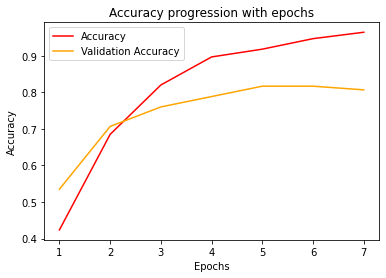

In [111]:
accuracy = history_optimal.history['accuracy']
validation_accuracy = history_optimal.history['val_accuracy']
epochs = range(1,8)
plt.plot(epochs, accuracy, 'r', label='Accuracy')
plt.plot(epochs, validation_accuracy, 'orange', label='Validation Accuracy')
plt.title('Accuracy progression with epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

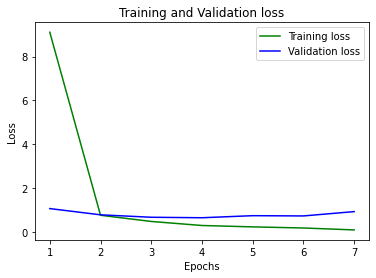

In [113]:
loss_training = history_optimal.history['loss']
loss_validation = history_optimal.history['val_loss']
epochs = range(1,8)
plt.plot(epochs, loss_training, 'g', label='Training loss')
plt.plot(epochs, loss_validation, 'b', label='Validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

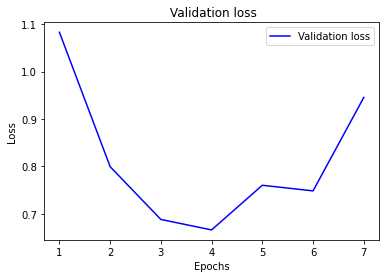

In [116]:
loss_training = history_optimal.history['loss']
loss_validation = history_optimal.history['val_loss']
epochs = range(1,8)

plt.plot(epochs, loss_validation, 'b', label='Validation loss')
plt.title(' Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()